In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:

#print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pydicom
import nibabel as nib
import os

from pprint import pprint
from pydicom.pixel_data_handlers.util import apply_voi_lut
from tqdm import tqdm
from glob import glob

In [4]:
train_data = pd.read_csv("../input/rsna-2022-cervical-spine-fracture-detection/train.csv")
print('training data shape:', train_data.shape)


training data shape: (2019, 9)


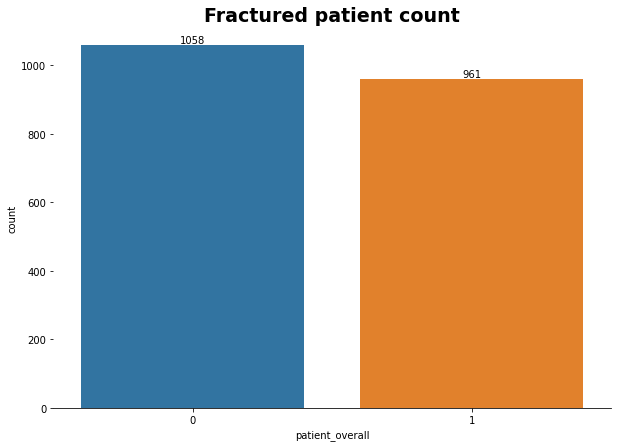

In [5]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=train_data, x="patient_overall")
for container in ax.containers:
    ax.bar_label(container)
ax.set_title("Fractured patient count", weight="bold", size=19)
sns.despine(right=True, top=True, left=True);

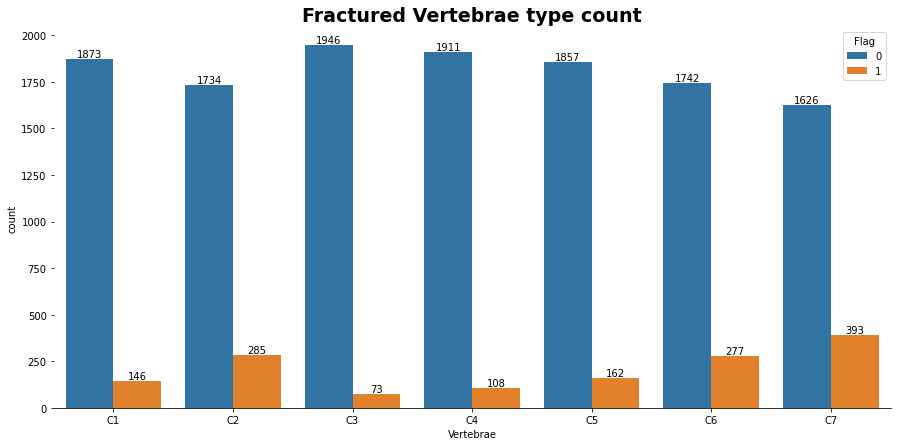

In [6]:
data_count = pd.melt(train_data, 
             id_vars=['StudyInstanceUID', 'patient_overall'],
             var_name="Vertebrae",
             value_name="Flag")

plt.figure(figsize=(15, 7))
ax = sns.countplot(data=data_count, x="Vertebrae", hue="Flag")
for container in ax.containers:
    ax.bar_label(container)
ax.set_title("Fractured Vertebrae type count", weight="bold", size=19)
sns.despine(right=True, top=True, left=True);